# Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

•  For the arriving airport, you can use the Destination column in the searches file. 

• Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

• Bonus point: Solving this problem using pandas (instead of any other approach)

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

## Data Path in my computer

In [2]:
!ls /home/dsc/Data/challenge/

bookings.csv.bz2  searches.csv.bz2


## Step 1: Let's start by working with a sample of our dataset

We will use the sample we have created in Exercise 1

In [5]:
searches_sample = pd.read_csv('searches.sample.csv.bz2',compression='bz2', sep='^')

In [6]:
searches_sample.shape

(999, 45)

In [7]:
searches_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [8]:
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [9]:
searches_sample['Month'] = searches_sample['Date'].str[-5:-3]
searches_sample['Month']

0      01
1      01
2      01
3      01
4      01
       ..
994    01
995    01
996    01
997    01
998    01
Name: Month, Length: 999, dtype: object

In [12]:
mad_searches_sample = searches_sample[ searches_sample['Destination'] == 'MAD']
bcn_searches_sample = searches_sample[ searches_sample['Destination'] == 'BCN']
mal_searches_sample = searches_sample[ searches_sample['Destination'] == 'AGP']

In [14]:
searches_mad = mad_searches_sample.groupby("Month")[['Destination']].count()
searches_mad

,Destination
Month,
01,11


In [15]:
searches_bcn = bcn_searches_sample.groupby("Month")[['Destination']].count()
searches_bcn

,Destination
Month,
01,26


In [16]:
searches_mal = mal_searches_sample.groupby("Month")[['Destination']].count()
searches_mal

,Destination
Month,
01,7


Our sample is too small. We only have data for january. Let's create a bigger sample.

In [17]:
sample = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^',nrows=100000)

In [18]:
sample.shape

(100000, 45)

In [19]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [20]:
sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [21]:
sample['Month'] = sample['Date'].str[-5:-3]
sample['Month']

0        01
1        01
2        01
3        01
4        01
         ..
99995    04
99996    04
99997    04
99998    04
99999    04
Name: Month, Length: 100000, dtype: object

In [22]:
mad_sample = sample[ sample['Destination'] == 'MAD']
bcn_sample = sample[ sample['Destination'] == 'BCN']
mal_sample = sample[ sample['Destination'] == 'AGP']

In [23]:
searches_mad = mad_sample.groupby("Month")[['Destination']].count()
searches_mad

,Destination
Month,
01,425
02,400
03,433
04,147


In [24]:
searches_bcn = bcn_sample.groupby("Month")[['Destination']].count()
searches_bcn

,Destination
Month,
01,517
02,497
03,536
04,174


In [25]:
searches_mal = mal_sample.groupby("Month")[['Destination']].count()
searches_mal

,Destination
Month,
01,169
02,147
03,187
04,31


In [26]:
madrid = searches_mad.reset_index()
barcelona = searches_bcn.reset_index()
malaga = searches_mal.reset_index()

Let's plot results:

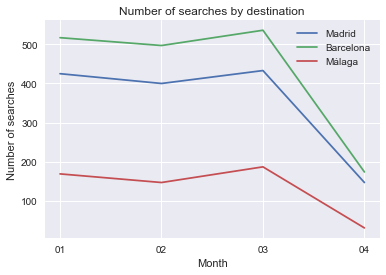

In [27]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by destination')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 2: Let's try it now with a sample and by using chunks

We will do it now by using chunks and by selecting only 'Date' and 'Destination' columns in order to reduce the file size and the time of execution.

In [29]:
chksize = 10000

In [30]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Destination'], nrows=100000, iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_sample = df[ df['Destination'] == 'MAD']
    bcn_sample = df[ df['Destination'] == 'BCN']
    mal_sample = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_sample.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_sample.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_sample.groupby("Month")[['Destination']].count())
    chunk_counter+=1

print(chunk_counter)

10


In [31]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [32]:
searches_mad.sample(10)

,Destination
Month,
03,14
03,145
01,148
03,133
01,11
02,155
02,129
01,125
04,147


In [36]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()

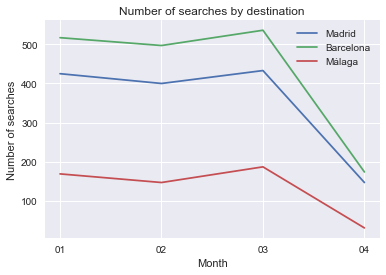

In [37]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by destination')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 3: Let's try it now with the whole dataset

In [50]:
chksize = 500000

In [41]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Destination'], iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_sample = df[ df['Destination'] == 'MAD']
    bcn_sample = df[ df['Destination'] == 'BCN']
    mal_sample = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_sample.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_sample.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_sample.groupby("Month")[['Destination']].count())
    chunk_counter+=1

print(chunk_counter)

41


In [43]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [45]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()

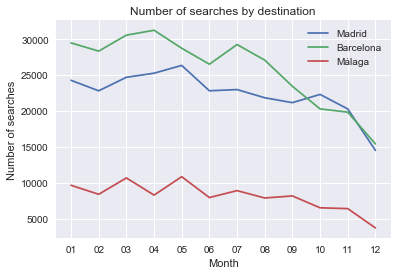

In [46]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by destination')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 4: Bonus Point

Repeat the process dropping searches duplicated.

In [49]:
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice', 'Month'],
      dtype='object')

In order to define unique searches we will use 'Date', 'Time','OfficeID' and 'TerminalID' to drop duplicates.

Let's try first with a sample:

In [54]:
chksize = 10000

In [55]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID','Destination'], nrows=100000, iterator=True, chunksize=chksize)
all_chunks= []
chunk_counter=0

for df in reader:
    all_chunks.append(df.drop_duplicates())
    chunk_counter+=1

print(chunk_counter)

10


In [57]:
unique_searches_sample = pd.concat(all_chunks)

In [58]:
unique_searches_sample.shape

(100000, 5)

Apparently there were not duplicates in our sample so let's try it with the whole dataset:

In [3]:
chksize = 200000

In [7]:
%%time

reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID','Destination'], iterator=True, chunksize=chksize)
all_chunks= []
chunk_counter=0

for df in reader:
    all_chunks=all_chunks.append(df)
    all_chunks.drop_duplicates(inplace=True)
    chunk_counter+=1
    print(chunk_counter)

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [8]:
%%time

reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID','Destination'], iterator=True, chunksize=chksize)
all_chunks= pd.DataFrame()
chunk_counter=0

for df in reader:
    all_chunks=all_chunks.append(df)
    all_chunks.drop_duplicates(inplace=True)
    chunk_counter+=1
    print(chunk_counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
CPU times: user 4min 30s, sys: 8.39 s, total: 4min 38s
Wall time: 4min 2s


In [10]:
all_chunks.shape

(359003, 5)

In [11]:
all_chunks.sample(10)

,Date,Time,OfficeID,Destination,TerminalID
287966,2013-10-15,13:06:05,c67abd6f0b032ef75348ecbecb4cb276,WAW,d41d8cd98f00b204e9800998ecf8427e
12572,2013-01-13,09:08:57,63d35a15724f95939e6d0dd0ca39be16,PER,d41d8cd98f00b204e9800998ecf8427e
121448,2013-05-02,09:26:32,50c54b52322080d2c257390f714f91bd,BUE,d41d8cd98f00b204e9800998ecf8427e
263412,2013-09-21,10:54:44,3561a60621de06ab1badc8ca55699ef3,TNR,d41d8cd98f00b204e9800998ecf8427e
279918,2013-10-07,08:27:05,be34e1bcffed441e2a4ca0f251594aa7,CUN,d41d8cd98f00b204e9800998ecf8427e
270424,2013-09-28,11:25:06,624d8c3ac0b3a7ca03e3c167e0f48327,RHO,d41d8cd98f00b204e9800998ecf8427e
218131,2013-08-07,01:59:12,b695299cc14ddcd1e31f1c922b3e258c,PAT,d41d8cd98f00b204e9800998ecf8427e
269806,2013-09-27,03:08:46,c5152f20dcf4f2240e5cf2342b211f51,BOM,d41d8cd98f00b204e9800998ecf8427e
227895,2013-08-16,00:28:28,0740601840a7932f90bd45e09e97b268,LAS,d41d8cd98f00b204e9800998ecf8427e
270640,2013-09-28,08:38:40,78d46c82fcdadca8a41f0cd4f4810175,IEV,d41d8cd98f00b204e9800998ecf8427e


After dropping duplicates we only have 359003 rows to work with.

Let's continue with our analysis:

In [17]:
all_chunks.to_csv('/home/dsc/Data/challenge/searches_without_duplicates.csv',sep='^')

In [19]:
!ls /home/dsc/Data/challenge/

bookings.csv.bz2  searches.csv.bz2  searches_without_duplicates.csv


In [13]:
chksize=10000

In [20]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches_without_duplicates.csv', sep='^', usecols=['Date','Destination'], iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_sample = df[ df['Destination'] == 'MAD']
    bcn_sample = df[ df['Destination'] == 'BCN']
    mal_sample = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_sample.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_sample.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_sample.groupby("Month")[['Destination']].count())
    chunk_counter+=1

print(chunk_counter)

36


In [21]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [22]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()